In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the dataset

In [2]:
seat = pd.read_csv("seattle_incidents_summer_2014.csv")

/Users/andres/venvs/knowral-politics/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
seat.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


# Remove columns & convert column types

There are some columns with IDs that at least, for this exploration phase are not needed. Then, I'll convert the Date Time columns to datetime. 

In [4]:
columns_of_interest = [u'Offense Code', u'Offense Code Extension', u'Offense Type', u'Summary Offense Code',
       u'Summarized Offense Description', u'Date Reported',
       u'Occurred Date or Date Range Start', u'Occurred Date Range End',
       u'Hundred Block Location', u'District/Sector', u'Zone/Beat', u'Longitude', u'Latitude', u'Month',
       u'Year']
seattle = seat[columns_of_interest]

In [5]:
seattle["date_reported"] = pd.to_datetime(seattle["Date Reported"], infer_datetime_format=True)
seattle["date_occurred_start"] = pd.to_datetime(seattle["Occurred Date or Date Range Start"], infer_datetime_format=True)
seattle["date_occurred_end"] = pd.to_datetime(seattle["Occurred Date Range End"], infer_datetime_format=True)

/Users/andres/venvs/knowral-politics/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/andres/venvs/knowral-politics/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/andres/venvs/knowral-politics/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [6]:
# remove old columns of datetime for simplified ones
seattle = seattle.drop(["Date Reported", "Occurred Date or Date Range Start", "Occurred Date Range End"], axis=1)

In [7]:
seattle.head()

,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Hundred Block Location,District/Sector,Zone/Beat,Longitude,Latitude,Month,Year,date_reported,date_occurred_start,date_occurred_end
0,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,6XX BLOCK OF NW 74 ST,J,J2,-122.364672,47.682524,6,2014,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00
1,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,23XX BLOCK OF 43 AV E,C,C2,-122.277080,47.639901,6,2014,2015-06-24 11:09:00,2014-06-01 00:00:00,2015-06-24 11:09:00
2,2316,0,THEFT-MAIL,2300,MAIL THEFT,81XX BLOCK OF 11 AV SW,F,F3,-122.349312,47.529232,8,2014,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT
3,2599,0,COUNTERFEIT,2500,COUNTERFEIT,6XX BLOCK OF PINE ST,M,M2,-122.334818,47.612368,6,2014,2015-06-21 15:52:00,2014-06-20 13:38:00,NaT
4,2399,3,THEFT-OTH,2300,OTHER PROPERTY,77XX BLOCK OF SUNNYSIDE AV N,J,J3,-122.329379,47.685960,6,2014,2015-06-20 11:59:00,2014-06-01 11:59:00,2014-11-01 12:00:00


In [8]:
%matplotlib inline
plt.style.use('ggplot')

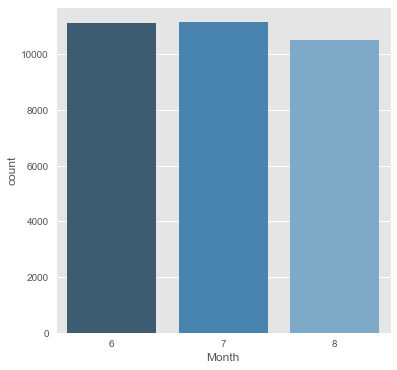

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x="Month", data=seattle, palette="Blues_d")


In [10]:
len(seattle["Summarized Offense Description"].unique())

48

In [11]:
seattle["Summarized Offense Description"].unique()

array(['BURGLARY', 'FRAUD', 'MAIL THEFT', 'COUNTERFEIT', 'OTHER PROPERTY',
       'EMBEZZLE', 'CAR PROWL', 'THREATS', 'PROPERTY DAMAGE',
       'LOST PROPERTY', 'FORGERY', 'VEHICLE THEFT',
       'BURGLARY-SECURE PARKING-RES', 'PICKPOCKET', 'BIKE THEFT',
       'NARCOTICS', 'DISPUTE', 'ASSAULT', 'STOLEN PROPERTY',
       'WARRANT ARREST', 'TRAFFIC', 'SHOPLIFTING', 'DISTURBANCE',
       'VIOLATION OF COURT ORDER', 'ILLEGAL DUMPING', 'PROSTITUTION',
       'ROBBERY', 'TRESPASS', 'LIQUOR VIOLATION', 'BIAS INCIDENT',
       'THEFT OF SERVICES', 'HOMICIDE', 'RECOVERED PROPERTY', 'OBSTRUCT',
       'RECKLESS BURNING', 'INJURY', 'WEAPON', 'PURSE SNATCH',
       'FALSE REPORT', 'ELUDING', 'ANIMAL COMPLAINT', 'PORNOGRAPHY', 'DUI',
       'FIREWORK', '[INC - CASE DC USE ONLY]', 'PUBLIC NUISANCE',
       'DISORDERLY CONDUCT', 'ESCAPE'], dtype=object)

In [12]:
seattle.groupby(["Summarized Offense Description"])["Offense Code"].count().sort_values(ascending=False)[:10]

Summarized Offense Description
CAR PROWL          6230
OTHER PROPERTY     3755
BURGLARY           3212
VEHICLE THEFT      3057
PROPERTY DAMAGE    2365
ASSAULT            2018
FRAUD              1473
DISTURBANCE        1333
THREATS            1178
STOLEN PROPERTY    1136
Name: Offense Code, dtype: int64

In [13]:
seattle[seattle["Summarized Offense Description"] == "HOMICIDE"].groupby(["Year", "Month"])["Summarized Offense Description"].count()

Year  Month
2014  6        2
      7        4
      8        2
Name: Summarized Offense Description, dtype: int64

In [14]:
seattle[seattle["Latitude"] > 0].describe()

,Offense Code Extension,Longitude,Latitude,Month,Year
count,30729.000000,30729.000000,30729.000000,30729.000000,30729.0
mean,4.196590,-122.330978,47.624726,6.929448,2014.0
std,12.014518,0.030513,0.055530,0.799860,0.0
min,0.000000,-122.425315,47.465063,6.000000,2014.0
25%,0.000000,-122.347717,47.598289,6.000000,2014.0
50%,0.000000,-122.331082,47.615838,7.000000,2014.0
75%,1.000000,-122.313446,47.667648,8.000000,2014.0
max,98.000000,-122.238970,47.749606,8.000000,2014.0


In [14]:
seattle.groupby(["Summarized Offense Description"])["Offense Code"].count().sort_values(ascending=False)

Summarized Offense Description
CAR PROWL                      6230
OTHER PROPERTY                 3755
BURGLARY                       3212
VEHICLE THEFT                  3057
PROPERTY DAMAGE                2365
ASSAULT                        2018
FRAUD                          1473
DISTURBANCE                    1333
THREATS                        1178
STOLEN PROPERTY                1136
WARRANT ARREST                 1021
SHOPLIFTING                     944
BIKE THEFT                      797
ROBBERY                         736
TRESPASS                        486
NARCOTICS                       391
BURGLARY-SECURE PARKING-RES     388
MAIL THEFT                      264
TRAFFIC                         252
PROSTITUTION                    202
DISPUTE                         171
LOST PROPERTY                   162
COUNTERFEIT                     159
PICKPOCKET                      146
WEAPON                          137
ANIMAL COMPLAINT                 96
THEFT OF SERVICES                

In [15]:
def convert_summary_offense_type(stype):
    sotypes = {
        "BURGLARY-SECURE PARKING-RES": "BURGLARY",
        
        "BIKE THEFT": "MINOR THEFT",
        "MAIL THEFT": "MINOR THEFT",
        "THEFT OF SERVICES": "MINOR THEFT",
        "PURSE SNATCH": "MINOR THEFT",
        "PICKPOCKET": "MINOR THEFT",
        
        "FORGERY": "FRAUD",
        "COUNTERFEIT": "FRAUD",

        
        "NARCOTICS": "NARCO-TRAFFIC-PROSTITUTION",
        "TRAFFIC": "NARCO-TRAFFIC-PROSTITUTION",
        "PROSTITUTION": "NARCO-TRAFFIC-PROSTITUTION",
        
        "DISORDERLY CONDUCT": "OTHER",
        "PORNOGRAPHY": "OTHER",
        "ESCAPE": "OTHER",
        "PUBLIC NUISANCE": "OTHER",
        "[INC - CASE DC USE ONLY]": "OTHER",
        "ELUDING": "OTHER",
        "FIREWORK": "OTHER",
        "BIAS INCIDENT": "OTHER",
        "RECKLESS BURNING": "OTHER",
        "FALSE REPORT": "OTHER",
        "ILLEGAL DUMPING": "OTHER",
        "RECOVERED PROPERTY": "OTHER",
        "DUI": "OTHER",
        "OBSTRUCT": "OTHER",
        "LIQUOR VIOLATION": "OTHER",

        "INJURY": "OTHER",
        "VIOLATION OF COURT ORDER": "OTHER",
        "ANIMAL COMPLAINT": "OTHER",
        "WEAPON": "OTHER",
        "DISPUTE": "OTHER",
        "LOST PROPERTY": "OTHER",
        
        "EMBEZZLE": "OTHER PROPERTY",
        "TRESPASS": "OTHER PROPERTY",
        
    }
        
        
    return sotypes.get(stype, stype)

seattle["offense_type"] = seattle["Summarized Offense Description"].apply(convert_summary_offense_type)

In [16]:
r = seattle.groupby(["Year", "Month", "offense_type"])["offense_type"].count()
sim_offense_type = pd.DataFrame(r)
sim_offense_type = sim_offense_type.rename(index=str, columns={"offense_type": "count"}).reset_index()

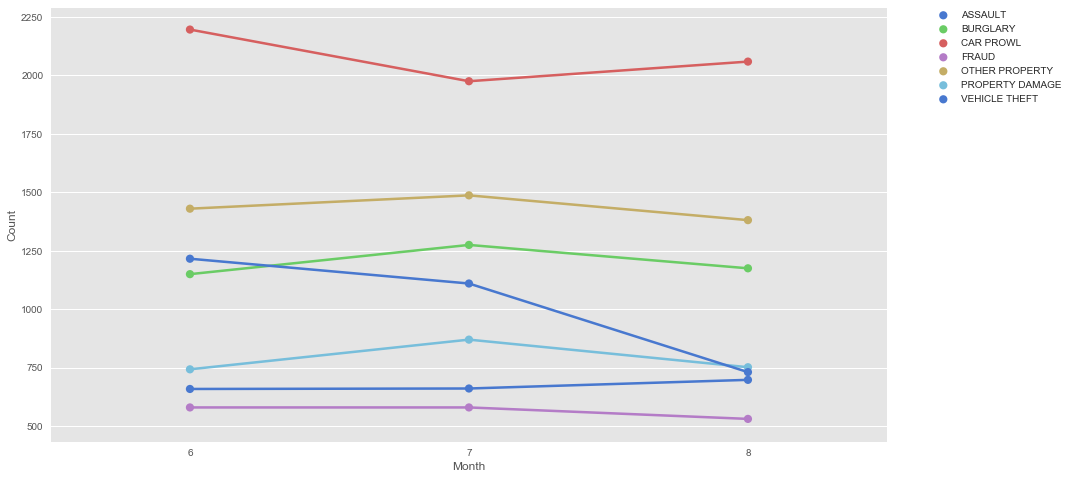

In [17]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="Month", y="count", hue="offense_type", data=sim_offense_type[sim_offense_type["count"] >= 500], 
              estimator=lambda x: x, palette="muted", scale=0.8)
ax.set(ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

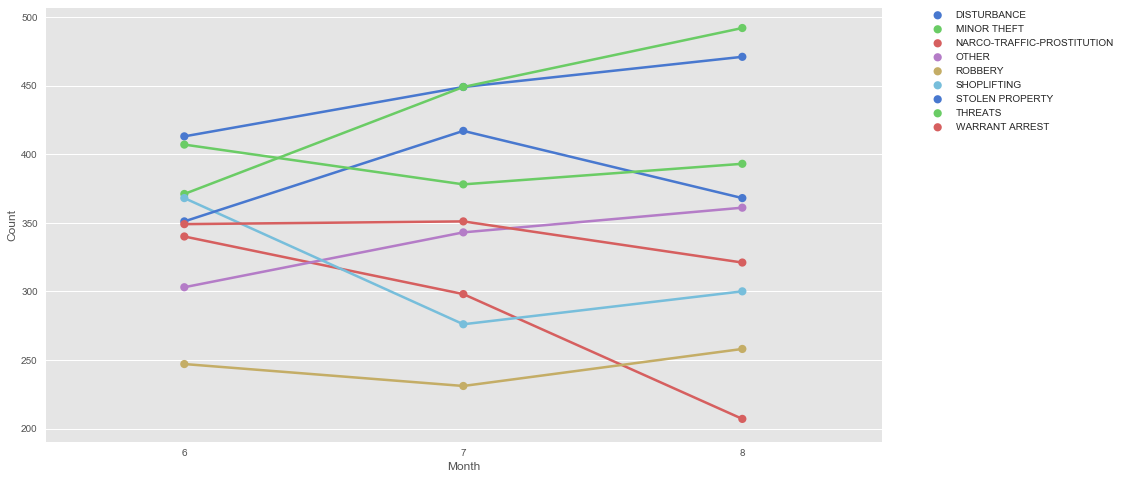

In [18]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="Month", y="count", hue="offense_type", 
                   data=sim_offense_type[(sim_offense_type["count"] >= 100) & (sim_offense_type["count"] < 500)], 
              estimator=lambda x: x, palette="muted", scale=0.8)
ax.set(ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

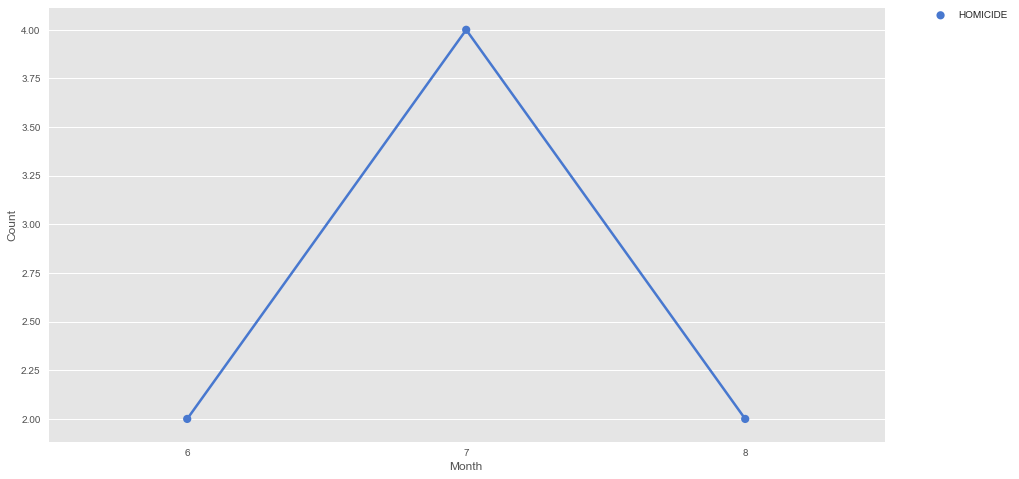

In [19]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x="Month", y="count", hue="offense_type", data=sim_offense_type[sim_offense_type["count"] < 100], 
              estimator=lambda x: x, palette="muted", scale=0.8)
ax.set(ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
seattle['date'] = seattle['date_occurred_start'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [21]:
seat_date_incident_count = seattle.groupby(["date"])["offense_type"].count().reset_index()
seat_date_incident_count.rename(columns={"offense_type": "Incident count"}, inplace=True)
seat_date_incident_count.set_index(pd.to_datetime(seat_date_incident_count["date"]), inplace=True)
seat_date_incident_count.drop(["date"], axis=1, inplace=True)
ts = seat_date_incident_count["Incident count"]

In [22]:
ts.head()

date
2014-06-01    397
2014-06-02    419
2014-06-03    357
2014-06-04    392
2014-06-05    386
Name: Incident count, dtype: int64

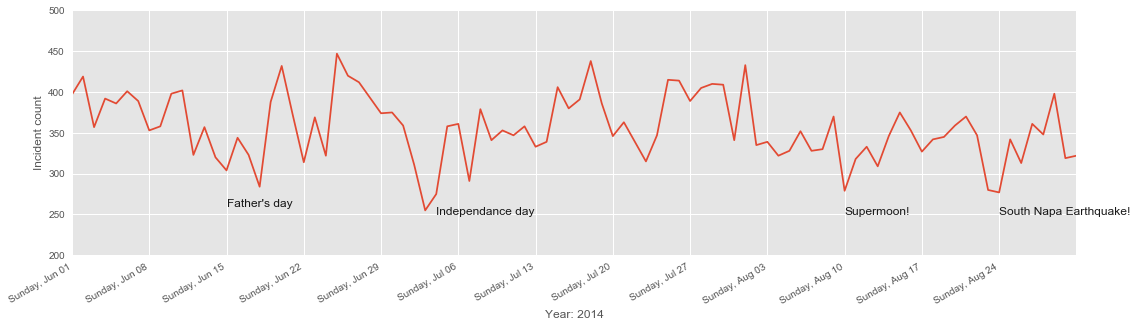

In [23]:
import matplotlib.dates as mdates

# build the figure
fig, ax = plt.subplots()
ax.set(ylim=(200, 500))
ax = sns.tsplot(ts, time=ts.index, value="Incident count", ax=ax)

style = dict(size=12, color='black', alpha=0.9)
ax.text(pd.to_datetime("20140704", format="%Y%m%d").value, 250, "Independance day", **style)
ax.text(pd.to_datetime("20140615", format="%Y%m%d").value, 260, "Father's day", **style)
ax.text(pd.to_datetime("20140810", format="%Y%m%d").value, 250, "Supermoon!", **style)
ax.text(pd.to_datetime("20140824", format="%Y%m%d").value, 250, "South Napa Earthquake!", **style)
# http://wnep.com/2014/08/08/193158/
# 2014 South Napa earthquake


start, end = ax.get_xlim()
stepsize= pd.Timedelta("1 day").value
ax.xaxis.set_ticks(np.arange(start, end, stepsize*7))
ax.set(xlabel="Year: 2014")

ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: pd.to_datetime(x).strftime("%A, %b %d")))

fig.set_size_inches(18, 5)
fig.autofmt_xdate()

In [24]:
seattle.shape

(32779, 17)

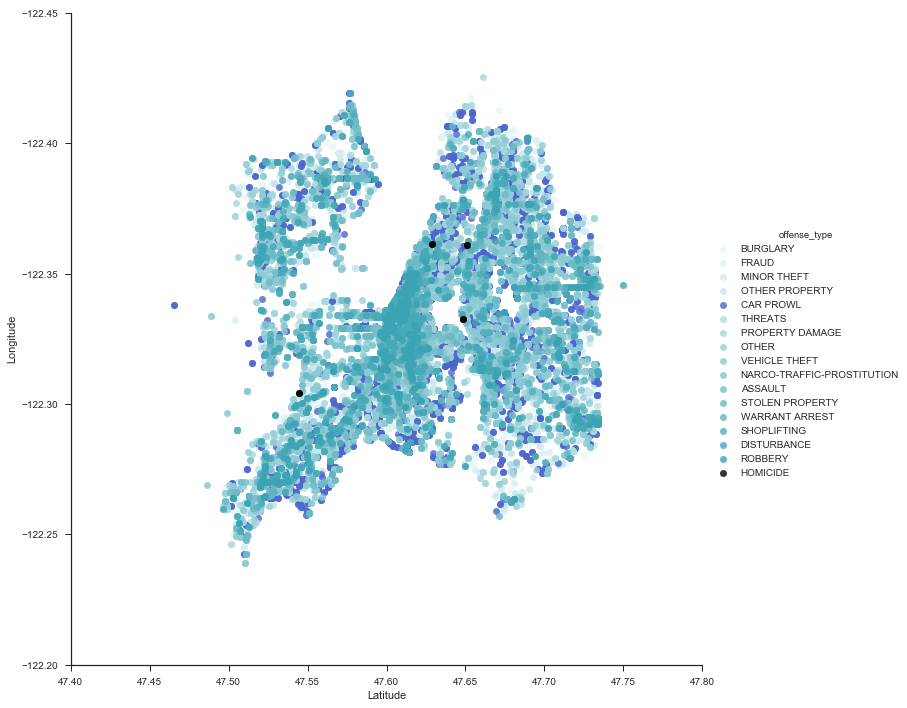

In [25]:
sns.set(style="ticks")
pt = sns.light_palette((210, 90, 60), input="husl", n_colors=17)
pt[4][0] = 0.3; pt[4][1] = 0.4; pt[4][2] = 0.804 # set homicide color in black
pt[-1][0] = 0; pt[-1][1] = 0; pt[-1][2] = 0 # set homicide color in black
g = sns.lmplot("Latitude", "Longitude", data=seattle, hue="offense_type", fit_reg=False, palette=pt, size=10) 
g.set(xlim=[47.40, 47.80], ylim=[-122.2, -122.45])

In [26]:
import geopandas as gpd

In [27]:
f = gpd.read_file("Neighborhoods/WGS84/Neighborhoods.shp")

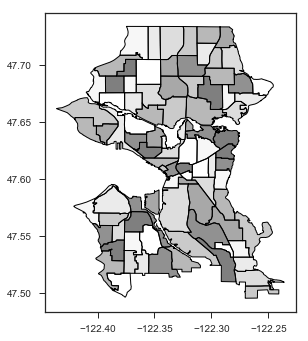

In [28]:
f.plot()

In [29]:
f.head()

,AREA,HOODS_,HOODS_ID,L_HOOD,L_HOODID,OBJECTID,PERIMETER,SHAPE_AREA,SHAPE_LEN,SYMBOL,SYMBOL2,S_HOOD,geometry
0,3588.443,2,0,None,0,1,617.843,0.0,0.0,0,0,OOO,"POLYGON ((-122.27397895294 47.69522647266366, ..."
1,22294.777,3,0,None,0,2,733.568,0.0,0.0,0,0,OOO,"POLYGON ((-122.2875597861966 47.6452274048213,..."
2,56695.367,5,0,None,0,3,4088.442,0.0,0.0,0,0,OOO,POLYGON ((-122.3952908582122 47.66513504453929...
3,64156.813,6,0,None,0,4,1809.446,0.0,0.0,0,0,OOO,POLYGON ((-122.3983207858678 47.66608770690771...
4,2993.164,7,0,None,0,5,250.330,0.0,0.0,0,0,OOO,POLYGON ((-122.2885127664105 47.65630022774356...


In [30]:
from shapely.geometry import Point

In [31]:
seattle["geometry"] = seattle.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

In [32]:
incidents = gpd.GeoDataFrame(seattle, geometry="geometry")

In [33]:
incidents.crs = {"init": "epsg:4326"}

In [34]:
# Perform the spatial join
result = gpd.sjoin(incidents, f, how="left")

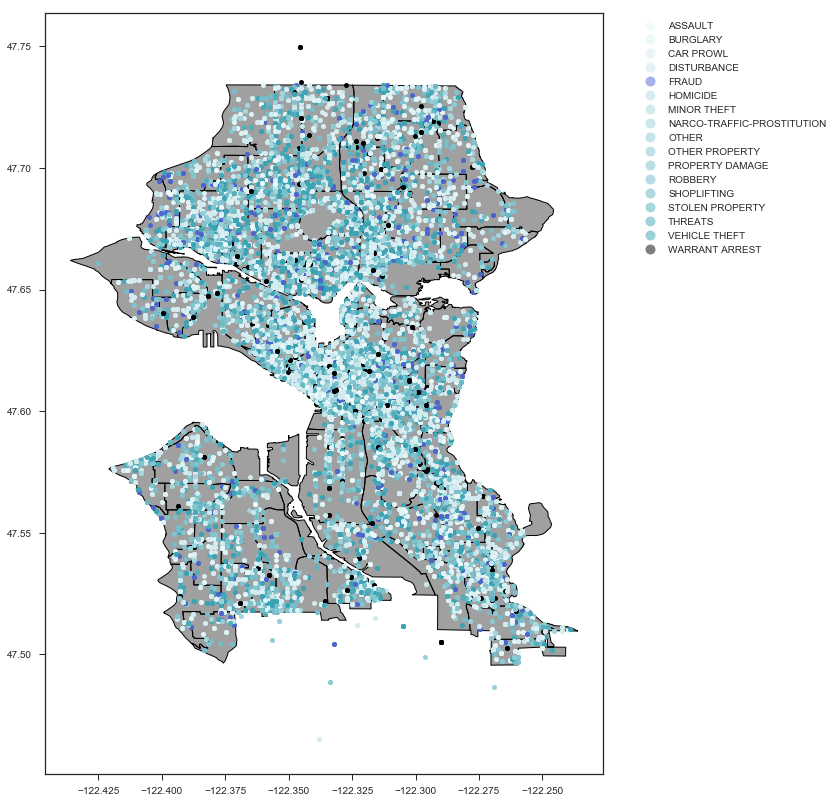

In [51]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 14)
sbase = f.plot(ax=ax, color="#434343")

pt = sns.light_palette((210, 90, 60), input="husl", n_colors=17)
pt[4][0] = 0.3; pt[4][1] = 0.4; pt[4][2] = 0.804 # set homicide color in black
pt[-1][0] = 0; pt[-1][1] = 0; pt[-1][2] = 0 # set homicide color in black

cmap1 = mpl.colors.ListedColormap(pt)

to_plot = result[(result["Longitude"] < 0) & (result["Latitude"] > 0)]

r = to_plot.plot(ax=sbase, column="offense_type", marker='o', cmap=cmap1, markersize=5, categorical=True, legend=True)
r.set(xlim=sbase.get_xlim(), ylim=sbase.get_ylim())
leg = r.get_legend()
leg.set_bbox_to_anchor((1.05, 1))

In [68]:
result[result["Latitude"] > 0]["Latitude"].describe()

count    30729.000000
mean        47.624726
std          0.055530
min         47.465063
25%         47.598289
50%         47.615838
75%         47.667648
max         47.749606
Name: Latitude, dtype: float64